# Generating IC conditions from a power spectrum

Here we rely on the nbodykit package.

In [39]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax

In [58]:
N = 128
MPC_h = 120

generator = cosmax.spectral_ops.Generator(N, MPC_h)

k = generator.k

A = 1.0
n = -3.0
Pk = A * k**n

print(Pk.shape)

(128,)


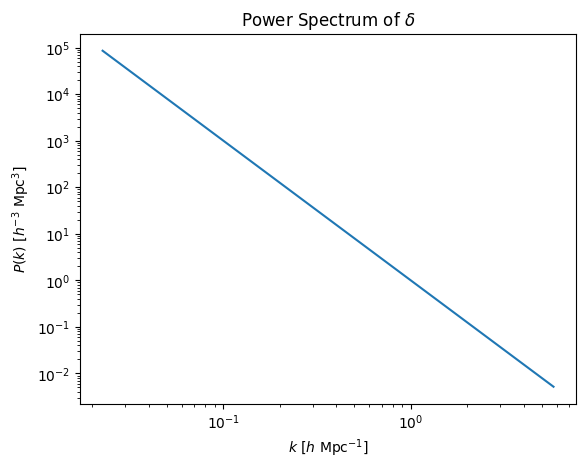

In [59]:
plt.plot(k, Pk, label='cosmax')
plt.title(r'Power Spectrum of $\delta$')
plt.xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
plt.ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')
plt.xscale('log')
plt.yscale('log')

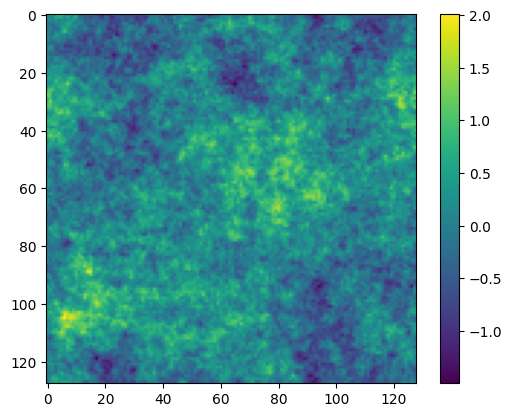

In [60]:
field = generator(123, Pk)

plt.figure()
plt.imshow(field[N//2])
plt.colorbar()


0.823974609375


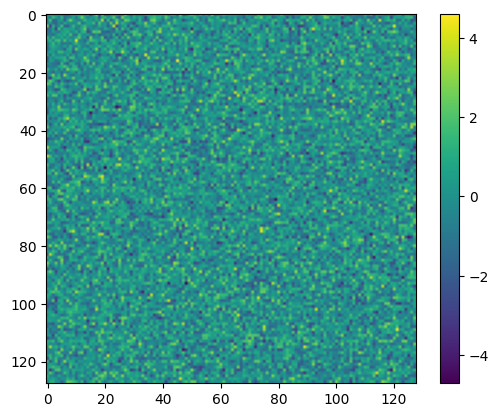

In [61]:
# generate random key
key = jax.random.PRNGKey(0)

# Generate the random field
delta = jax.random.normal(key, shape=(N, N, N)) / ((MPC_h ** 3 ) / N**3)

print((MPC_h ** 3 ) / N**3)

plt.figure()
plt.imshow(delta[N//2])
plt.colorbar()


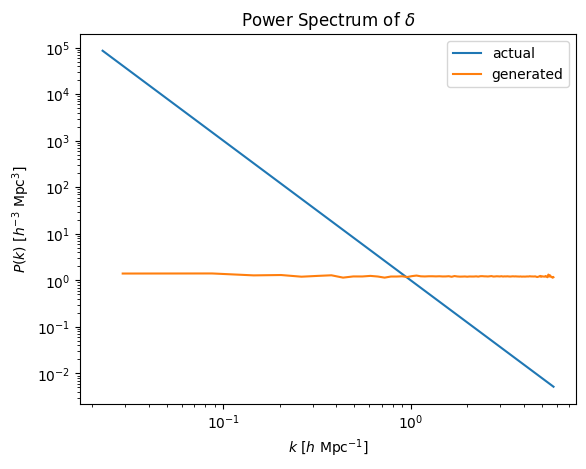

In [62]:

k_gen, Pk_gen = cosmax.spectral_ops.PowerSpectrum(N, MPC_h, 100)(delta)

plt.figure()

plt.plot(k, Pk, label='actual')
plt.plot(k_gen, Pk_gen, label='generated')
plt.title(r'Power Spectrum of $\delta$')
plt.xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
plt.ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
